<a href="https://colab.research.google.com/github/jpark0116/titanic/blob/main/titanic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Importing Dataset and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url_gs = "https://raw.githubusercontent.com/jpark0116/titanic/main/gender_submission.csv/"
url_test = "https://raw.githubusercontent.com/jpark0116/titanic/main/test.csv"
url_train = "https://raw.githubusercontent.com/jpark0116/titanic/main/train.csv"

df_test = pd.read_csv(url_test)
df_train = pd.read_csv(url_train)

###2. Basic Data Exploration

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##a. Variables Description:  

*   **Survived** : Survival *( 0=No, 1=Yes)*
*   **Pclass** : Ticket Class
*   **Age** : Age in years
*   **SibSp** : # of siblings / spouses aboard the Titanic	
*   **Parch** : # of parents / children aboard the Titanic	
*   **Ticket** : Ticket number	
*   **Fare** : Passenger fare	
*   **Cabin** : Cabin number
*   **Embarked** : Port of Embarkation *(C = Cherbourg, Q = Queenstown, S = Southampton)*

##b.Variable Notes:

**Pclass:** A proxy for socio-economic status (SES):
* 1 = Upper
* 2 = Middle
* 3 = Lower

**age:** 
* Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**SibSp:** 
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**Parch:** 

* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.







In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


"Age" category only has 714 values   
"Cabin" category only has 204 values  
"Embarked" category has 889 values  
There are 5 categorical variables *("name","sex","ticket","cabin","embarked")*


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


More people died than survived (approx. 38% of passengers survived.)

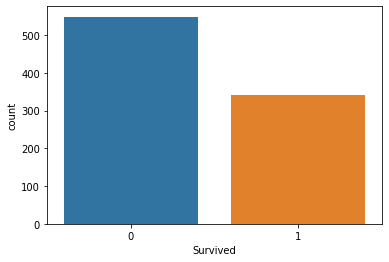

In [ ]:
sns.countplot(x='Survived', data=df_train)

In [ ]:
df_train.Survived.sum()/df_train.Survived.count()

0.3838383838383838

In [ ]:
df_train_group=df_train.groupby(['Sex','Survived'])

More likely to die if male (18.9% survival rate) 
More likely to survive if female (74.2% survival rate)

In [ ]:
df_train_group['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

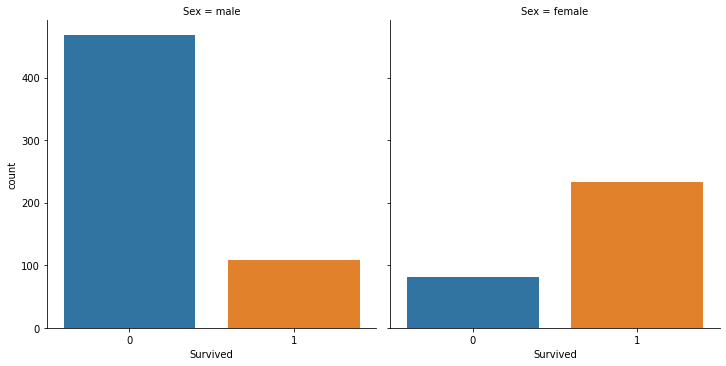

In [ ]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df_train)

In [ ]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [84]:
df_train_sex = df_train.groupby(['Sex'])
df_train_sex['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [83]:
df_train_sex['Survived'].sum()/df_train['Sex'].value_counts()

female    0.742038
male      0.188908
dtype: float64